In [15]:
import pandas as pd
import numpy as np
import csv
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot as plt

In [16]:
fund=pd.read_csv(r'./数据/股票型前三名数据.csv',dtype={'代码':str})#让代码读取数据为str
fund

,Unnamed: 0,Unnamed: 0.1,代码,名称,类型,时间,涨幅,净值
0,0,0,000828,泰达转型机遇股票A,股票型,2021-09-30,5.51,3.5640
1,1,0,000828,泰达转型机遇股票A,股票型,2021-09-29,-4.68,3.3780
2,2,0,000828,泰达转型机遇股票A,股票型,2021-09-28,-0.95,3.5440
3,3,0,000828,泰达转型机遇股票A,股票型,2021-09-27,-4.74,3.5780
4,4,0,000828,泰达转型机遇股票A,股票型,2021-09-24,-0.95,3.7560
...,...,...,...,...,...,...,...,...
3354,3354,2,005927,创金合信新能源汽车股票A,股票型,2018-05-17,-0.01,0.9994
3355,3355,2,005927,创金合信新能源汽车股票A,股票型,2018-05-16,0.0,0.9995
3356,3356,2,005927,创金合信新能源汽车股票A,股票型,2018-05-15,-0.03,0.9995
3357,3357,2,005927,创金合信新能源汽车股票A,股票型,2018-05-11,-0.02,0.9998


In [17]:
gp1=fund[fund['代码']=='005669']
gp1

,Unnamed: 0,Unnamed: 0.1,代码,名称,类型,时间,涨幅,净值
1681,1681,1,005669,前海开源公用事业股票,股票型,2021-09-30,4.11,3.1772
1682,1682,1,005669,前海开源公用事业股票,股票型,2021-09-29,-2.6,3.0519
1683,1683,1,005669,前海开源公用事业股票,股票型,2021-09-28,0.08,3.1334
1684,1684,1,005669,前海开源公用事业股票,股票型,2021-09-27,-3.13,3.1309
1685,1685,1,005669,前海开源公用事业股票,股票型,2021-09-24,0.68,3.2319
...,...,...,...,...,...,...,...,...
2524,2524,1,005669,前海开源公用事业股票,股票型,2018-04-20,-0.05,0.9990
2525,2525,1,005669,前海开源公用事业股票,股票型,2018-04-13,-0.01,0.9995
2526,2526,1,005669,前海开源公用事业股票,股票型,2018-04-04,-0.02,0.9996
2527,2527,1,005669,前海开源公用事业股票,股票型,2018-03-30,-0.02,0.9998


In [18]:
gp2=fund[fund['代码']=='000828']
gp2

,Unnamed: 0,Unnamed: 0.1,代码,名称,类型,时间,涨幅,净值
0,0,0,000828,泰达转型机遇股票A,股票型,2021-09-30,5.51,3.564
1,1,0,000828,泰达转型机遇股票A,股票型,2021-09-29,-4.68,3.378
2,2,0,000828,泰达转型机遇股票A,股票型,2021-09-28,-0.95,3.544
3,3,0,000828,泰达转型机遇股票A,股票型,2021-09-27,-4.74,3.578
4,4,0,000828,泰达转型机遇股票A,股票型,2021-09-24,-0.95,3.756
...,...,...,...,...,...,...,...,...
1676,1676,0,000828,泰达转型机遇股票A,股票型,2014-11-24,0.0,1.005
1677,1677,0,000828,泰达转型机遇股票A,股票型,2014-11-21,0.5,1.005
1678,1678,0,000828,泰达转型机遇股票A,股票型,2014-11-20,0.0,1.000
1679,1679,0,000828,泰达转型机遇股票A,股票型,2014-11-19,0.0,1.000


In [19]:
gp3=fund[fund['代码']=='005927']
gp3

,Unnamed: 0,Unnamed: 0.1,代码,名称,类型,时间,涨幅,净值
2529,2529,2,005927,创金合信新能源汽车股票A,股票型,2021-09-30,5.59,3.5156
2530,2530,2,005927,创金合信新能源汽车股票A,股票型,2021-09-29,-3.45,3.3296
2531,2531,2,005927,创金合信新能源汽车股票A,股票型,2021-09-28,-2.42,3.4486
2532,2532,2,005927,创金合信新能源汽车股票A,股票型,2021-09-27,-5.23,3.5342
2533,2533,2,005927,创金合信新能源汽车股票A,股票型,2021-09-24,-0.61,3.7291
...,...,...,...,...,...,...,...,...
3354,3354,2,005927,创金合信新能源汽车股票A,股票型,2018-05-17,-0.01,0.9994
3355,3355,2,005927,创金合信新能源汽车股票A,股票型,2018-05-16,0.0,0.9995
3356,3356,2,005927,创金合信新能源汽车股票A,股票型,2018-05-15,-0.03,0.9995
3357,3357,2,005927,创金合信新能源汽车股票A,股票型,2018-05-11,-0.02,0.9998


In [20]:
fund2=pd.read_csv(r'./数据/混合型-偏股前三名数据.csv',dtype={'代码':str})#让代码读取数据为str
fund2
hh=fund2[fund2['代码']=='006736']
hh

,Unnamed: 0,Unnamed: 0.1,代码,名称,类型,时间,涨幅,净值
0,7911,0,006736,国投瑞银先进制造混合,混合型-偏股,2021-09-30,5.04,4.6951
1,7912,0,006736,国投瑞银先进制造混合,混合型-偏股,2021-09-29,-5.54,4.4698
2,7913,0,006736,国投瑞银先进制造混合,混合型-偏股,2021-09-28,-1.16,4.7320
3,7914,0,006736,国投瑞银先进制造混合,混合型-偏股,2021-09-27,-5.54,4.7875
4,7915,0,006736,国投瑞银先进制造混合,混合型-偏股,2021-09-24,-2.35,5.0681
...,...,...,...,...,...,...,...,...
636,8547,0,006736,国投瑞银先进制造混合,混合型-偏股,2019-02-25,0.02,1.0003
637,8548,0,006736,国投瑞银先进制造混合,混合型-偏股,2019-02-22,0.0,1.0001
638,8549,0,006736,国投瑞银先进制造混合,混合型-偏股,2019-02-15,0.0,1.0001
639,8550,0,006736,国投瑞银先进制造混合,混合型-偏股,2019-02-01,0.01,1.0001


## 制作训练集    #将训练集写入Test.csv 用代码为000828、005927、006736三个基金的数据作为训练集

In [21]:
#单取该基金的净值
fileTrain = 'Train.csv'
train=gp2['净值'].values.tolist()
train.reverse() 
train=[str(i) for i in train]
train

['1.0',
 '1.0',
 '1.0',
 '1.005',
 '1.005',
 '1.005',
 '1.005',
 '1.005',
 '1.074',
 '1.074',
 '1.074',
 '1.074',
 '1.074',
 '1.229',
 '1.229',
 '1.229',
 '1.229',
 '1.229',
 '1.244',
 '1.244',
 '1.244',
 '1.244',
 '1.244',
 '1.351',
 '1.351',
 '1.351',
 '1.351',
 '1.351',
 '1.291',
 '1.291',
 '1.091',
 '1.115',
 '1.141',
 '1.142',
 '1.139',
 '1.101',
 '1.104',
 '1.085',
 '1.074',
 '1.087',
 '1.125',
 '1.137',
 '1.035',
 '1.024',
 '1.079',
 '1.078',
 '1.085',
 '1.074',
 '1.051',
 '1.043',
 '1.03',
 '1.019',
 '0.991',
 '1.016',
 '1.003',
 '0.996',
 '0.983',
 '0.994',
 '1.01',
 '1.011',
 '1.011',
 '1.017',
 '1.017',
 '1.019',
 '1.006',
 '1.027',
 '1.026',
 '1.033',
 '1.006',
 '1.002',
 '0.989',
 '0.99',
 '1.015',
 '1.002',
 '1.007',
 '1.034',
 '1.042',
 '1.066',
 '1.082',
 '1.103',
 '1.094',
 '1.111',
 '1.128',
 '1.126',
 '1.108',
 '1.116',
 '1.11',
 '1.145',
 '1.134',
 '1.153',
 '1.163',
 '1.176',
 '1.207',
 '1.208',
 '1.188',
 '1.221',
 '1.25',
 '1.253',
 '1.253',
 '1.28',
 '1.291',
 '

In [22]:
train1=gp3['净值'].values.tolist()
train1.reverse() 
train1=[str(i) for i in train1]
train1

['1.0',
 '0.9998',
 '0.9995',
 '0.9995',
 '0.9994',
 '0.9993',
 '0.9991',
 '0.9991',
 '0.999',
 '0.9989',
 '0.9989',
 '0.9987',
 '0.9981',
 '0.9976',
 '0.9976',
 '0.9968',
 '0.9902',
 '0.9952',
 '0.9951',
 '0.994',
 '0.9914',
 '0.9937',
 '0.9939',
 '0.9923',
 '0.9899',
 '0.9874',
 '0.9827',
 '0.9833',
 '0.982',
 '0.9826',
 '0.9828',
 '0.9833',
 '0.9825',
 '0.9823',
 '0.984',
 '0.9826',
 '0.9827',
 '0.9854',
 '0.9845',
 '0.9858',
 '0.9857',
 '0.9855',
 '0.9848',
 '0.9851',
 '0.9847',
 '0.9836',
 '0.9843',
 '0.9829',
 '0.9847',
 '0.9858',
 '0.9858',
 '0.9859',
 '0.9851',
 '0.985',
 '0.985',
 '0.984',
 '0.984',
 '0.9836',
 '0.9827',
 '0.9832',
 '0.9819',
 '0.982',
 '0.9806',
 '0.9815',
 '0.9814',
 '0.9812',
 '0.9812',
 '0.9811',
 '0.9811',
 '0.981',
 '0.9809',
 '0.9809',
 '0.9808',
 '0.9808',
 '0.9807',
 '0.9806',
 '0.9805',
 '0.9805',
 '0.9804',
 '0.9804',
 '0.9803',
 '0.9802',
 '0.9802',
 '0.9803',
 '0.9804',
 '0.9802',
 '0.9802',
 '0.9802',
 '0.9803',
 '0.9804',
 '0.9802',
 '0.9802',
 

In [23]:
train2=hh['净值'].values.tolist()
train2.reverse() 
train2=[str(i) for i in train2]
train2

['1.0',
 '1.0001',
 '1.0001',
 '1.0001',
 '1.0003',
 '1.0032',
 '1.0042',
 '1.0055',
 '1.0083',
 '1.0091',
 '1.0094',
 '1.0095',
 '1.0099',
 '1.0075',
 '1.0135',
 '1.0146',
 '1.0132',
 '1.0112',
 '1.0104',
 '1.0122',
 '1.0114',
 '1.0091',
 '1.0103',
 '1.0111',
 '1.0114',
 '1.0057',
 '1.0039',
 '1.0018',
 '1.005',
 '1.0106',
 '1.0117',
 '1.0136',
 '1.0132',
 '1.0112',
 '1.0105',
 '1.0131',
 '1.0076',
 '1.0075',
 '1.0044',
 '1.0089',
 '1.0153',
 '1.0113',
 '1.0114',
 '1.0061',
 '1.0037',
 '1.0048',
 '0.9971',
 '0.9944',
 '0.9919',
 '0.9923',
 '0.9789',
 '0.9791',
 '0.9761',
 '0.9746',
 '0.9827',
 '0.9794',
 '0.9773',
 '0.9836',
 '0.9835',
 '0.9756',
 '0.9703',
 '0.9732',
 '0.9723',
 '0.9659',
 '0.9652',
 '0.9703',
 '0.9699',
 '0.9697',
 '0.9682',
 '0.9679',
 '0.9669',
 '0.9662',
 '0.9665',
 '0.9619',
 '0.9662',
 '0.9726',
 '0.9701',
 '0.9695',
 '0.9664',
 '0.9662',
 '0.9666',
 '0.9689',
 '0.972',
 '0.978',
 '0.9747',
 '0.9714',
 '0.9753',
 '0.9875',
 '0.9817',
 '0.9817',
 '1.0038',
 '1.0

In [24]:
#将训练集写入Test.csv
trainFile = open(fileTrain, 'w')
trainFile.write(",".join(train))
trainFile.write("\n")
trainFile.write(",".join(train1))
trainFile.write("\n")
trainFile.write(",".join(train2))
print('训练集已写入')
trainFile.close()

训练集已写入


## 制作测试集     #将测试集写入Test.csv 用代码为005669的基金作为测试集

In [25]:
fileTest = 'Test.csv'
test=gp1['净值'].values.tolist()
test.reverse() 
test=[str(i) for i in train]
test

['1.0',
 '1.0',
 '1.0',
 '1.005',
 '1.005',
 '1.005',
 '1.005',
 '1.005',
 '1.074',
 '1.074',
 '1.074',
 '1.074',
 '1.074',
 '1.229',
 '1.229',
 '1.229',
 '1.229',
 '1.229',
 '1.244',
 '1.244',
 '1.244',
 '1.244',
 '1.244',
 '1.351',
 '1.351',
 '1.351',
 '1.351',
 '1.351',
 '1.291',
 '1.291',
 '1.091',
 '1.115',
 '1.141',
 '1.142',
 '1.139',
 '1.101',
 '1.104',
 '1.085',
 '1.074',
 '1.087',
 '1.125',
 '1.137',
 '1.035',
 '1.024',
 '1.079',
 '1.078',
 '1.085',
 '1.074',
 '1.051',
 '1.043',
 '1.03',
 '1.019',
 '0.991',
 '1.016',
 '1.003',
 '0.996',
 '0.983',
 '0.994',
 '1.01',
 '1.011',
 '1.011',
 '1.017',
 '1.017',
 '1.019',
 '1.006',
 '1.027',
 '1.026',
 '1.033',
 '1.006',
 '1.002',
 '0.989',
 '0.99',
 '1.015',
 '1.002',
 '1.007',
 '1.034',
 '1.042',
 '1.066',
 '1.082',
 '1.103',
 '1.094',
 '1.111',
 '1.128',
 '1.126',
 '1.108',
 '1.116',
 '1.11',
 '1.145',
 '1.134',
 '1.153',
 '1.163',
 '1.176',
 '1.207',
 '1.208',
 '1.188',
 '1.221',
 '1.25',
 '1.253',
 '1.253',
 '1.28',
 '1.291',
 '

In [31]:
#将测试集写入Test.csv
testFile = open(fileTest, 'w')
testFile.write(",".join(test))
testFile.write("\n")
print('测试集已写入')
# testFile.close()

测试集已写入


## 我采用的是神经网络的LSTM模型，因为对于基金净值的有序数据来说，采用循环神经网络更加切合。
  
    步骤：
1、导入训练集和测试集的数据
2、将输入转化成[样本数，时间步长，特征数]
3、将输出转化成[样本数，特征数]
4、做出训练模型
5、做出评估模型
6、进行预测
6、预测可视化

## 开始预测

X_train的长度: 201	y_train的长度: 201
X_validation的长度: 14	y_validation的长度: 14
Epoch 1/250
38/38 [==============================] - 2s 11ms/step - loss: 3.6302 - val_loss: 4.9514
Epoch 2/250
38/38 [==============================] - 0s 3ms/step - loss: 3.4010 - val_loss: 4.7732
Epoch 3/250
38/38 [==============================] - 0s 3ms/step - loss: 3.2189 - val_loss: 4.6296
Epoch 4/250
38/38 [==============================] - 0s 3ms/step - loss: 3.0538 - val_loss: 4.4786
Epoch 5/250
38/38 [==============================] - 0s 3ms/step - loss: 2.8878 - val_loss: 4.3620
Epoch 6/250
38/38 [==============================] - 0s 3ms/step - loss: 2.6957 - val_loss: 4.2021
Epoch 7/250
38/38 [==============================] - 0s 3ms/step - loss: 2.5131 - val_loss: 4.0917
Epoch 8/250
38/38 [==============================] - 0s 3ms/step - loss: 2.3398 - val_loss: 3.9987
Epoch 9/250
38/38 [==============================] - 0s 3ms/step - loss: 2.1671 - val_loss: 3.7625
Epoch 10/250
38/38 [================

38/38 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 2.6799
Epoch 83/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 2.6633
Epoch 84/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 2.6706
Epoch 85/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0221 - val_loss: 2.6749
Epoch 86/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 2.6575
Epoch 87/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0240 - val_loss: 2.6600
Epoch 88/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0256 - val_loss: 2.6934
Epoch 89/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 2.6768
Epoch 90/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0244 - val_loss: 2.6356
Epoch 91/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0245 - val_loss: 2.7069
Epoch 92/250


38/38 [==============================] - 0s 3ms/step - loss: 0.0234 - val_loss: 2.5709
Epoch 164/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0192 - val_loss: 2.4863
Epoch 165/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 2.5531
Epoch 166/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - val_loss: 2.4763
Epoch 167/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 2.5184
Epoch 168/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 2.4819
Epoch 169/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 2.5204
Epoch 170/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 2.5017
Epoch 171/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0100 - val_loss: 2.5026
Epoch 172/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0095 - val_loss: 2.4875
Epoc

38/38 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 2.3867
Epoch 245/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 2.3949
Epoch 246/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 2.3890
Epoch 247/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 2.3904
Epoch 248/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 2.3777
Epoch 249/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 2.3967
Epoch 250/250
38/38 [==============================] - 0s 3ms/step - loss: 0.0072 - val_loss: 2.3849
训练集分数: 0.611
测试集分数: 3.234
未来7天实际百分比涨幅为：[ 2.0746888  -3.65853659 -0.94936709 -4.73908413 -0.95025154 -4.68397291
  5.5062167 ]
未来7天预测百分比涨幅为：[ 1.2565157  -0.95930177  0.6868616   2.1403744   1.7492191   0.5344413
  1.4325913 ]


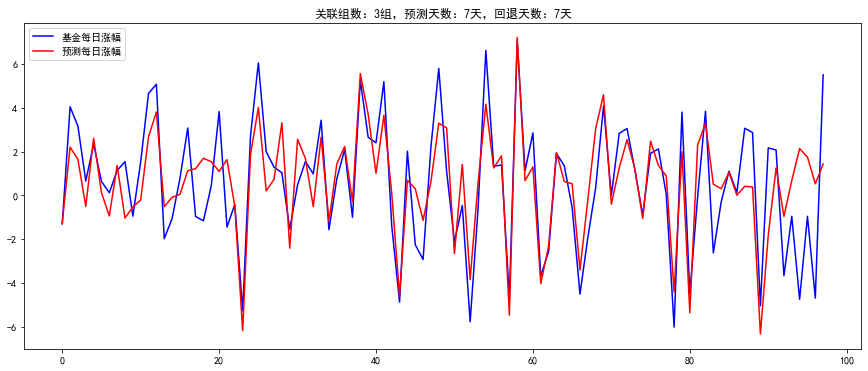

In [51]:
#防止图乱码
plt.rcParams['font.sans-serif']='SimHei'
plt.rcParams['axes.unicode_minus']=False

batch_size = 4
epochs = 250 #经过测试，大概在250的数值趋于平稳
time_step = 3 #用多少组天数进行预测
input_size = 7 #每组天数，亦即预测天数
look_back = time_step * input_size #时间窗口大小
showdays = 120 #最后画图观察的天数（测试天数）

X_train = []
y_train = []
X_validation = []
y_validation = []
testset = [] #用来保存测试基金的近期净值

#忽略掉最近的forget_days天数据（回退天数，用于预测的复盘）
forget_days = 7

#转化数据
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(0, len(dataset) - look_back, input_size):
        x = dataset[i: i + look_back]
        dataX.append(x)
        y = dataset[i + look_back: i + look_back + input_size]
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

#采用keras中的sequential模型
def build_model():
    model = Sequential()
    model.add(LSTM(units=128, input_shape=(time_step, input_size)))
    model.add(Dense(units=input_size))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# 设定随机数种子
seed = 7
np.random.seed(seed)

# 导入数据（训练集）
with open(fileTrain) as f:
    row = csv.reader(f, delimiter=',')
    for r in row:
        dataset = []
        r = [x for x in r if x != 'None']
        #涨跌幅是2天之间比较，数据会减少1个
        days = len(r) - 1
        #有效天数太少，忽略
        if days <= look_back + input_size:
            continue
        for i in range(days):
            f1 = float(r[i])
            f2 = float(r[i+1])
            if f1 == 0 or f2 == 0:
                dataset = []
                break
            #把数据放大100倍，相当于以百分比为单位
            f2 = (f2 - f1) / f1 * 100
            #如果涨跌幅绝对值超过15%，基金数据恐有问题，忽略该组数据
            if f2 > 15 or f2 < -15:
                dataset = []
                break
            dataset.append(f2)
        n = len(dataset)
        #进行预测的复盘，忽略掉最近forget_days的训练数据
        n -= forget_days
        if n >= look_back + input_size:
            #如果数据不是input_size的整数倍，忽略掉最前面多出来的
            m = n % input_size
            X_1, y_1 = create_dataset(dataset[m:n])
            X_train = np.append(X_train, X_1)
            y_train = np.append(y_train, y_1)

# 导入数据（测试集）
with open(fileTest) as f:
    row = csv.reader(f, delimiter=',')
    #写成了循环，但实际只有1条测试数据
    for r in row:
        dataset = []
        #去掉记录为None的数据（当天数据缺失）
        r = [x for x in r if x != 'None']
        #涨跌幅是2天之间比较，数据会减少1个
        days = len(r) - 1
        #有效天数太少，忽略，注意：测试集最后会虚构一个input_size
        if days <= look_back:
            print('only {} days data. exit.'.format(days))
            continue
        #只需要最后画图观察天数的数据
        if days > showdays:
            r = r[days-showdays:]
            days = len(r) - 1
        for i in range(days):
            f1 = float(r[i])
            f2 = float(r[i+1])
            if f1 == 0 or f2 == 0:
                print('zero value found. exit.')
                dataset = []
                break
            #把数据放大100倍，相当于以百分比为单位
            f2 = (f2 - f1) / f1 * 100
            #如果涨跌幅绝对值超过15%，基金数据恐有问题，忽略该组数据
            if f2 > 15 or f2 < -15:
                print('{} 数据超过 15 %.，忽略'.format(f2))
                dataset = []
                break
            testset.append(f1)
            dataset.append(f2)
        #保存最近一天基金净值
        f1=float(r[days])
        testset.append(f1)
        #测试集虚构一个input_size的数据（若有forget_days的数据，则保留）
        if forget_days < input_size:
            for i in range(forget_days,input_size):
                dataset.append(0)
                testset.append(np.nan)
        else:
            dataset = dataset[:len(dataset) - forget_days + input_size]
            testset = testset[:len(testset) - forget_days + input_size]
        if len(dataset) >= look_back + input_size:
            #将testset修正为input_size整数倍加1
            m = (len(testset) - 1) % input_size
            testset = testset[m:]
            m = len(dataset) % input_size
            #将dataset修正为input_size整数倍
            X_validation, y_validation = create_dataset(dataset[m:])

#将输入转化成[样本数，时间步长，特征数]
X_train = X_train.reshape(-1, time_step, input_size)
X_validation = X_validation.reshape(-1, time_step, input_size)

#将输出转化成[样本数，特征数]
y_train = y_train.reshape(-1, input_size)
y_validation = y_validation.reshape(-1, input_size)

print('X_train的长度: {}\ty_train的长度: {}'.format(len(X_train), len(y_train)))
print('X_validation的长度: {}\ty_validation的长度: {}'.format(len(X_validation), len(y_validation)))

# 训练模型
model = build_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.25, shuffle=True)

# 评估模型
train_score = model.evaluate(X_train, y_train, verbose=0)
validation_score = model.evaluate(X_validation, y_validation, verbose=0)

# 预测
predict_validation = model.predict(X_validation)

#将之前虚构的最后一组input_size里面的0涨跌改为NAN（不显示虚假的0）
if forget_days < input_size:
    for i in range(forget_days,input_size):
        y_validation[-1, i] = np.nan

print('训练集分数: {:.3f}'.format(train_score))
print('测试集分数: {:.3f}'.format(validation_score))
print('未来{}天实际百分比涨幅为：{}'.format(input_size, y_validation[-1]))
print('未来{}天预测百分比涨幅为：{}'.format(input_size, predict_validation[-1]))

#进行reshape(-1, 1)是为了plt显示
y_validation = y_validation.reshape(-1, 1)
predict_validation = predict_validation.reshape(-1, 1)
testset = np.array(testset).reshape(-1, 1)

# 图表显示
fig=plt.figure(figsize=(15,6))
plt.plot(y_validation, color='blue', label='基金每日涨幅')
plt.plot(predict_validation, color='red', label='预测每日涨幅')
plt.legend(loc='upper left')
plt.title('关联组数：{}组，预测天数：{}天，回退天数：{}天'.format(time_step, input_size, forget_days))
plt.show()


In [49]:
print(predict_validation)




[[-7.3778027e-01]
 [ 2.2020538e+00]
 [ 2.0657933e+00]
 [-7.4042535e-01]
 [ 2.9824274e+00]
 [-8.3824378e-01]
 [ 2.2428618e-01]
 [-2.5079874e-03]
 [-1.1996957e-02]
 [-9.4890916e-01]
 [-1.1884676e+00]
 [ 2.0600243e+00]
 [ 3.9917483e+00]
 [ 5.1012921e-01]
 [ 1.4698860e-02]
 [-2.7598904e-02]
 [ 1.5418662e+00]
 [ 4.1342074e-01]
 [ 9.0093762e-01]
 [ 1.8138851e+00]
 [ 2.1911116e+00]
 [ 4.1206077e-01]
 [-4.8661426e-01]
 [-5.6078386e+00]
 [ 1.4006327e+00]
 [ 5.1495867e+00]
 [ 3.9648169e-01]
 [ 7.5041854e-01]
 [ 2.5060132e+00]
 [-1.8133974e+00]
 [ 1.5902618e+00]
 [ 1.9245408e+00]
 [ 5.3155375e-01]
 [ 3.4380479e+00]
 [-1.3800627e+00]
 [ 1.8046399e+00]
 [ 2.2252715e+00]
 [-1.5907794e+00]
 [ 4.9363031e+00]
 [ 3.3492665e+00]
 [ 1.3533417e+00]
 [ 4.1356740e+00]
 [ 1.4861358e+00]
 [-3.5387957e+00]
 [ 1.1667939e+00]
 [-9.6046728e-01]
 [-1.0948182e+00]
 [ 4.4485134e-01]
 [ 2.8794920e+00]
 [ 2.5845282e+00]
 [-2.2830150e+00]
 [ 2.0232337e+00]
 [-3.3421521e+00]
 [ 6.3878280e-01]
 [ 3.2716367e+00]
 [ 1.21105

In [43]:
print(y_train)
print(y_validation)

[[[-0.66326531 -3.74935799 -0.32017076  4.71092077  0.30674847
   -0.254842    6.0296372 ]
  [-0.04819277  0.33751205  1.29745315  1.13851992 -1.36022514
    0.47551117  2.41362991]
  [-0.2310536   2.50115794  0.3163127  -3.55855856  1.54133582
   -1.149954    0.18613309]]

 [[-0.04819277  0.33751205  1.29745315  1.13851992 -1.36022514
    0.47551117  2.41362991]
  [-0.2310536   2.50115794  0.3163127  -3.55855856  1.54133582
   -1.149954    0.18613309]
  [-1.30051092  4.04705882  3.16598824  0.65760631  2.35191638
    0.63829787  0.12684989]]

 [[-0.2310536   2.50115794  0.3163127  -3.55855856  1.54133582
   -1.149954    0.18613309]
  [-1.30051092  4.04705882  3.16598824  0.65760631  2.35191638
    0.63829787  0.12684989]
  [ 1.1402027   1.54488518 -0.94572368  1.53590702  4.66067048
    5.078125   -1.97026022]]

 [[-1.30051092  4.04705882  3.16598824  0.65760631  2.35191638
    0.63829787  0.12684989]
  [ 1.1402027   1.54488518 -0.94572368  1.53590702  4.66067048
    5.078125   -1.970

## 从上图可以看出，其中loss是训练集上的损失，val_loss是测试集上的损失。首先是loss从一开始的3.6484降至0.0097，然后是val_loss由4.9909降至2.5735.由此可以看出这个模型是能发挥作用的。但val_loss测试后的值还是有点高，这就证明测试集的数据还是要优化的。然后是看图，图中主要看基金的每日涨幅和预测的涨幅是否重合，这是判断该模型预测的数据重要依据。图中的重合度还是很好的，所以预测的数据也基本正常。

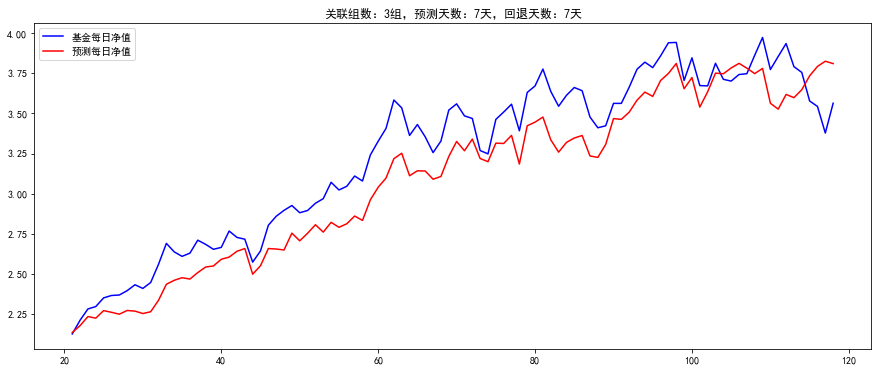

In [14]:
# 实际净值、预测净值
y_validation_plot = np.empty_like(testset)
predict_validation_plot = np.empty_like(testset)
y_validation_plot[:, :] = np.nan
predict_validation_plot[:, :] = np.nan

y = testset[look_back, 0]
p = testset[look_back, 0]
for i in range(look_back, len(testset)-1):
    y *= (1 + y_validation[i-look_back, 0] / 100)
    p *= (1 + predict_validation[i-look_back, 0] / 100)
    #print('{:.4f} {:.4f} {:.4f}'.format(testset[i+1,0], y, p))
    y_validation_plot[i, :] = y
    predict_validation_plot[i, :] = p

# 图表显示
fig=plt.figure(figsize=(15,6))
plt.plot(y_validation_plot, color='blue', label='基金每日净值')
plt.plot(predict_validation_plot, color='red', label='预测每日净值')
plt.legend(loc='upper left')
plt.title('关联组数：{}组，预测天数：{}天，回退天数：{}天'.format(time_step, input_size, forget_days))
plt.show()


## 由上图可以看出，预测的净值和基金的每日净值形状类似，证明涨幅也是类似的。